In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib.patheffects as PathEffects
import rasterio as rs
from rasterio.plot import show
from shapely.geometry import mapping
%matplotlib inline

In [2]:
Earthquakes = pd.read_excel(r'[YOUR FILE LOCATION HERE]\Japan Earthquakes.xlsx')
#df = df[(df['mag'] >= 5.5)].reset_index()
Earthquakes.head(10)

time  latitude  longitude   depth  mag magType  nst  \
0  2023-05-05T05:42:04.305Z   37.5402   137.3053   8.712  6.2     mww  132   
1  2023-02-25T13:27:42.966Z   42.7801   145.0736  50.181  6.0     mww  157   
2  2023-05-05T17:47:15.641Z   41.5129   141.9749  52.915  5.9     mww  221   
3  2023-05-01T03:22:09.910Z   26.0075   128.5838  10.813  5.9     mww   76   
4  2023-03-22T07:37:01.134Z   40.3031   143.0358  35.412  5.6     mww   77   
5  2023-05-05T12:58:03.633Z   37.4932   137.2783   8.222  5.6     mwb  134   
6  2023-03-24T04:25:26.072Z   29.9829   141.9136   4.574  5.4     mww   82   
7  2023-05-02T15:27:23.423Z   25.3709    99.2446  10.000  5.3     mww  152   
8  2023-05-01T07:59:37.923Z   25.9584   128.5430  10.000  5.3     mww  115   
9  2023-05-01T02:22:27.800Z   25.9711   128.5975   6.761  5.3     mww   74   

   gap   dmin   rms  ... Unnamed: 27 Unnamed: 28 Unnamed: 29 Unnamed: 30  \
0   29  1.226  0.83  ...         NaN         NaN         NaN         NaN   
1   49  1.612  0.91  ...         NaN         NaN         NaN         NaN   
2   32  0.997  0.80  ...         NaN         NaN         NaN         NaN   
3   57  0.871  0.75  ...         NaN         NaN         NaN         NaN   
4   98  1.579  0.90  ...         NaN         NaN         NaN         NaN   
5   46  1.201  0.74  ...         NaN         NaN         NaN         NaN   
6   92  3.601  0.77  ...         NaN         NaN         NaN         NaN   
7   25  4.079  0.78  ...         NaN         NaN         NaN         NaN   
8   46  0.907  0.79  ...         NaN         NaN         NaN         NaN   
9   64  0.909  0.83  ...         NaN         NaN         NaN         NaN   

  Unnamed: 31  Unnamed: 32  Unnamed: 33  Unnamed: 34  \
0         NaN          NaN          NaN          NaN   
1         NaN          NaN          NaN          NaN   
2         NaN          NaN          NaN          NaN   
3         NaN          NaN          NaN          NaN   
4         NaN          NaN          NaN          NaN   
5         NaN          NaN          NaN          NaN   
6         NaN          NaN          NaN          NaN   
7         NaN          NaN          NaN          NaN   
8         NaN          NaN          NaN          NaN   
9         NaN          NaN          NaN          NaN   

   130 km east of Sendai, Japan earthquake  
0                           NaN        NaN  
1                           NaN        NaN  
2                           NaN        NaN  
3                           NaN        NaN  
4                           NaN        NaN  
5                           NaN        NaN  
6                           NaN        NaN  
7                           NaN        NaN  
8                           NaN        NaN  
9                           NaN        NaN  

[10 rows x 37 columns]

In [3]:
Cities = pd.read_excel(r'[YOUR FILE LOCATION HERE]\Japan Cities.xlsx')
Cities.head(5)

City  Longitude  Latitude  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0   Sendai  140.86667  38.26667         NaN         NaN         NaN   
1    Tokyo  139.69171  35.68950         NaN         NaN         NaN   
2    Osaka  135.50218  34.69374         NaN         NaN         NaN   
3  Fukuoka  130.41667  33.60000         NaN         NaN         NaN   
4   Nagoya  136.90641  35.18147         NaN         NaN         NaN   

   Unnamed: 6  Yokohama  139.65  35.43333  
0         NaN       NaN     NaN       NaN  
1         NaN       NaN     NaN       NaN  
2         NaN       NaN     NaN       NaN  
3         NaN       NaN     NaN       NaN  
4         NaN       NaN     NaN       NaN

In [4]:
Volcanoes = pd.read_excel(r'[YOUR FILE LOCATION HERE]\Japan Volcanoes.xlsx')
Volcanoes.head(5)

Volcano  Longitude  Latitude
0  Sakurajima    130.6500   31.5833
1       Ontake   137.4485   35.8823
2        Unzen   130.2672   32.7805
3          Aso   131.1212   32.9521
4         Fuji   138.7274   35.3606

In [5]:
#Japan Shapefiles
Japan_admin = gpd.read_file(r'C:\Users\Anton\Desktop\Visualization\Shapefiles\Country\Japan\japan_administrative.shp')
Japan_admin0 = gpd.read_file(r'C:\Users\Anton\Desktop\Visualization\Shapefiles\Country\Japan\JPN_adm0.shp')
Japan_admin1 = gpd.read_file(r'C:\Users\Anton\Desktop\Visualization\Shapefiles\Country\Japan\JPN_adm1.shp') 
Japan_coastline = gpd.read_file(r'C:\Users\Anton\Desktop\Visualization\Shapefiles\Country\Japan\japan_coastline.shp') 
Japan_water = gpd.read_file(r'C:\Users\Anton\Desktop\Visualization\Shapefiles\Country\Japan\japan_water.shp') 
Japan_water_areas = gpd.read_file(r'C:\Users\Anton\Desktop\Visualization\Shapefiles\Country\Japan\JPN_water_areas_dcw.shp') 
Japan_roads = gpd.read_file(r'C:\Users\Anton\Desktop\Visualization\Shapefiles\Country\Japan\JPN_roads.shp') 
Japan_ocean = gpd.read_file(r'C:\Users\Anton\Desktop\Visualization\Shapefiles\Ocean, Lakes, Global\ne_10m_ocean\ne_10m_ocean.shp')

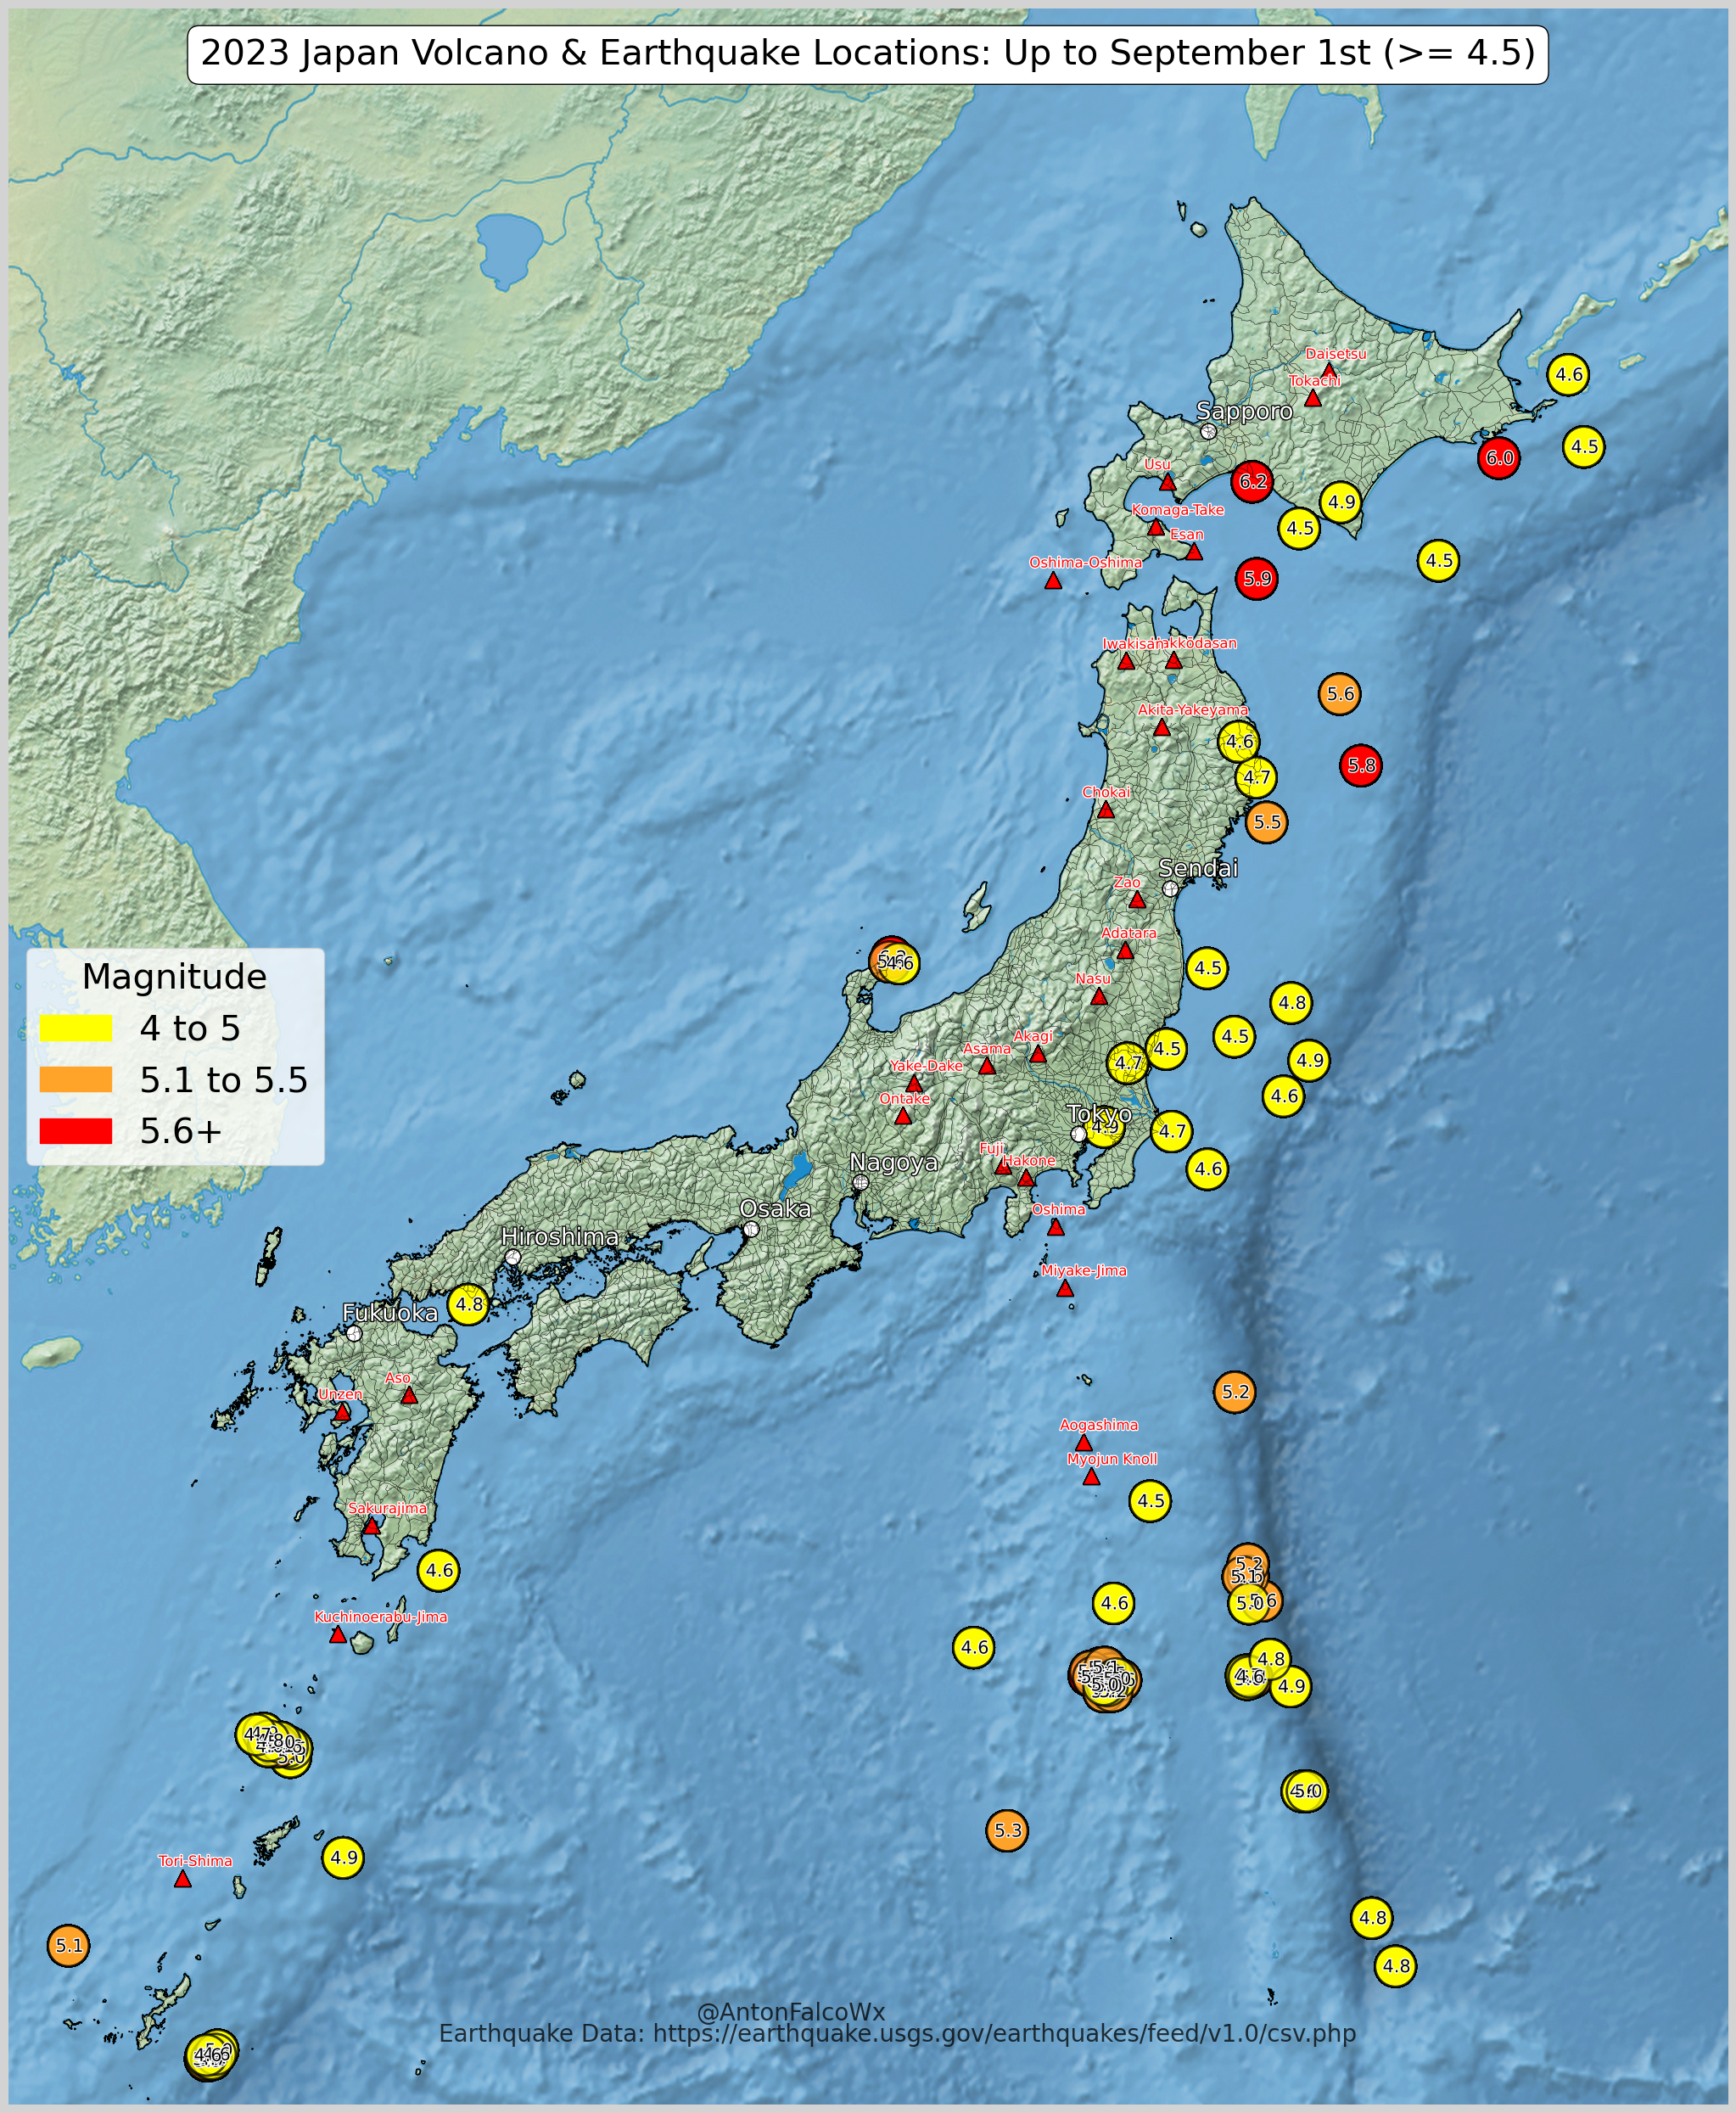

In [6]:
fig, ax = plt.subplots(figsize=(40,25))
fig.patch.set_facecolor('lightgray')

#Background and Projection Change
japan_ne = rs.open(r'[YOUR FILE LOCATION HERE]\Natural Earth 10m\NE2_HR_LC_SR_W_DR\NE2_HR_LC_SR_W_DR.tif', crs="EPSG:6684")
show(ax=ax, source=japan_ne, interpolation='sinc',  aspect='equal')


#Japan shapefiles
Japan_admin0.plot(ax=ax, color='none', edgecolor='black', linewidth=1)
#Japan_admin1.plot(ax=ax, color='none', edgecolor='black', linewidth=3)
Japan_coastline.plot(ax=ax, color='none', edgecolor='black', linewidth=1)
Japan_water.plot(ax=ax, color='#0e87cc', linewidth=0.5, alpha=0.85)
Japan_water_areas.plot(ax=ax, color='#0e87cc', linewidth=0.5, alpha=0.85)
Japan_roads.plot(ax=ax, color='black',linewidth=0.4, alpha=0.9)



#Changing map scale
xlim = ([126, 148])
ylim = ([25.5, 47.5])
ax.set_xlim(xlim)
ax.set_ylim(ylim)


#Labels
Mag = (Earthquakes['mag'])
Long = (Earthquakes['longitude'])
Lat = (Earthquakes['latitude'])


#Earthquake Location Annotation By Color
scale = ListedColormap(['#ffff00', '#ffa329', '#ff0000']) 

for i, txt in enumerate(Mag):
    ax.annotate(txt, (Long[i], Lat[i]), xytext=(1,-5), color='black',fontweight='bold', ha='center',textcoords='offset points', fontsize=15, path_effects=[PathEffects.withStroke(linewidth=2,foreground="w")])
    ax.scatter((Earthquakes['longitude']), (Earthquakes['latitude']), c=Mag, s=1200, cmap=scale, edgecolor='black', linewidths=2, alpha=0.75)


#Legend
Yellow = mpatches.Patch(color='#ffff00', label='4 to 5')
Orange = mpatches.Patch(color='#ffa329', label='5.1 to 5.5')
Red = mpatches.Patch(color='#ff0000', label='5.6+')
ax.legend(handles=[Yellow, Orange, Red], title="Magnitude", title_fontsize=30, fontsize=20, loc="center left", prop={'size': 30}) #frameon=False



#City Labels
City = (Cities['City'])
Longitude = (Cities['Longitude'])
Latitude = (Cities['Latitude'])

for i, txt in enumerate(City):
    ax.annotate(txt, (Longitude[i], Latitude[i]), xytext=(-10,10), color='white',fontweight='bold', textcoords='offset points',fontsize=20, path_effects=[PathEffects.withStroke(linewidth=2,foreground="black")])
    plt.scatter(Cities['Longitude'], Cities['Latitude'], s=175, edgecolor='black', color='white', alpha=0.9)

    
#Volcano Labels
Volcano = (Volcanoes['Volcano'])
Longitude = (Volcanoes['Longitude'])
Latitude = (Volcanoes['Latitude'])

for i, txt in enumerate(Volcano):
    ax.annotate(txt, (Longitude[i], Latitude[i]), xytext=(-20,10), color='red',fontweight='bold', textcoords='offset points',fontsize=12, path_effects=[PathEffects.withStroke(linewidth=2,foreground="w")])
    plt.scatter(Volcanoes['Longitude'], Volcanoes['Latitude'], marker='^', s=200, edgecolor='black', color='red', alpha=0.9)


    
#Title/style changes
ax.set_title("2023 Japan Volcano & Earthquake Locations: Up to September 1st (>= 4.5)", y=0.97, fontsize=30, fontweight='bold', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.35'))
ax.axis("off")
plt.text(0.4, 0.04, '@AntonFalcoWx', fontsize=20, transform=ax.transAxes, alpha=0.75)
plt.text(0.25, 0.03, 'Earthquake Data: https://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php', fontsize = 20, transform=ax.transAxes, alpha=0.75)

#plt.savefig('Japan Earthquakes.jpg', dpi=400)
fig.tight_layout()
plt.show()

In [7]:
#Filtering an example CSV taken from USGS site
Find_Japan = pd.read_csv(r'C:\Users\Anton\Downloads\4.5_month.csv')

#Finding all instances of 'Japan' in a sheet
Japan = Find_Japan['place'].str.contains('Japan')
filtered_JP = Find_Japan[Japan]

#After finding all 'Japan', sort by earthquake magnitude
sorted_JP = filtered_JP.sort_values('mag', ascending=False) 
sorted_JP.head(20)


time  latitude  longitude   depth  mag magType  \
287  2023-08-24T22:48:23.830Z   39.5520   143.3084  18.000  5.8     mww   
104  2023-09-08T09:28:50.567Z   38.9566   142.1006  53.810  5.5      mb   
52   2023-09-10T15:01:59.835Z   29.2510   129.4406  10.000  5.3     mww   
95   2023-09-08T18:08:14.047Z   29.2619   129.4628   9.322  5.1     mww   
96   2023-09-08T17:28:52.081Z   29.1461   129.6079  20.224  5.0     mww   
36   2023-09-11T16:46:12.027Z   29.3017   129.4783  10.000  5.0      mb   
25   2023-09-12T08:57:27.193Z   28.0882   130.2821  10.000  4.9      mb   
360  2023-08-18T18:33:04.874Z   42.3156   143.0491  61.192  4.9     mww   
246  2023-08-27T17:03:52.681Z   36.4551   142.6445  30.761  4.9      mb   
139  2023-09-05T04:27:17.924Z   35.7592   140.0207  72.490  4.9      mb   
87   2023-09-08T22:47:03.060Z   29.3938   129.2651  10.000  4.9      mb   
22   2023-09-12T13:58:01.065Z   30.1715   142.1454  10.000  4.8      mb   
260  2023-08-26T13:29:33.086Z   33.8956   131.8843  82.726  4.8      mb   
256  2023-08-27T00:56:48.353Z   35.4704   141.0546  40.894  4.8      mb   
239  2023-08-28T09:08:32.595Z   37.0609   142.4156  11.671  4.8      mb   
137  2023-09-05T07:22:06.975Z   23.0364   124.4685  10.000  4.8     mww   
60   2023-09-10T05:28:33.164Z   29.3180   129.3340  11.430  4.8      mb   
90   2023-09-08T22:09:49.136Z   25.0940   124.8015  74.338  4.8      mb   
74   2023-09-09T09:28:28.345Z   29.3808   129.1732  10.000  4.7      mb   
219  2023-08-29T12:37:12.511Z   35.7113   140.8847  45.806  4.7      mb   

       nst    gap   dmin   rms  ...                   updated  \
287  139.0   51.0  2.117  0.39  ...  2023-09-02T01:45:56.807Z   
104   94.0  128.0  1.997  0.85  ...  2023-09-09T13:43:54.626Z   
52    52.0   87.0  2.415  0.83  ...  2023-09-10T15:28:04.040Z   
95   143.0   56.0  2.398  0.63  ...  2023-09-09T16:52:19.040Z   
96    78.0   92.0  2.466  1.07  ...  2023-09-09T16:32:14.040Z   
36    55.0   91.0  2.356  0.86  ...  2023-09-11T17:18:02.040Z   
25    55.0  103.0  2.178  0.61  ...  2023-09-12T09:17:49.040Z   
360  257.0   64.0  0.311  0.68  ...  2023-09-13T19:33:23.040Z   
246   65.0  126.0  3.575  0.62  ...  2023-09-03T20:27:57.040Z   
139   70.0  131.0  1.661  0.71  ...  2023-09-08T15:02:10.993Z   
87    29.0  106.0  2.345  0.37  ...  2023-09-09T01:29:40.040Z   
22    50.0  118.0  3.545  0.68  ...  2023-09-12T14:47:18.040Z   
260   45.0   66.0  1.666  0.71  ...  2023-08-27T06:48:35.389Z   
256   55.0  130.0  2.484  0.69  ...  2023-08-27T01:14:10.040Z   
239   83.0  110.0  3.416  0.94  ...  2023-09-04T08:53:00.040Z   
137   62.0   55.0  1.354  1.14  ...  2023-09-05T09:40:06.182Z   
60    88.0  107.0  2.388  0.67  ...  2023-09-10T06:16:46.040Z   
90    53.0   87.0  0.879  0.65  ...  2023-09-08T23:50:51.040Z   
74    46.0  105.0  2.392  0.86  ...  2023-09-09T09:56:45.040Z   
219   31.0  160.0  2.319  0.42  ...  2023-08-29T13:33:54.040Z   

                                    place        type horizontalError  \
287             117 km E of Yamada, Japan  earthquake            7.02   
104           35 km ESE of Ōfunato, Japan  earthquake            5.28   
52              90 km N of Tatsugō, Japan  earthquake            6.12   
95              90 km N of Tatsugō, Japan  earthquake            4.26   
96              77 km N of Tatsugō, Japan  earthquake            5.43   
36              95 km N of Tatsugō, Japan  earthquake            7.35   
25            78 km ESE of Tatsugō, Japan  earthquake            3.89   
360               20 km W of Hiroo, Japan  earthquake            5.84   
246            170 km ESE of Iwaki, Japan  earthquake            8.25   
139              6 km SW of Shiroi, Japan  earthquake            6.74   
87           109 km NNW of Tatsugō, Japan  earthquake            5.76   
22              Izu Islands, Japan region  earthquake           11.43   
260              8 km SW of Hikari, Japan  earthquake            3.47   
256             35 km SE of Hasaki, Japan  earthquake        